# Neural Networks in Tensorflow

Today we'll use <a href="https://www.tensorflow.org/">tensorflow</a> to create a neural network that classifies <a href="https://keras.io/api/datasets/fashion_mnist/">images of clothing</a>.

In [2]:
from tensorflow import keras
(data, target), (test_data, test_target) = keras.datasets.fashion_mnist.load_data()

Let's check out the size of this dataset.

In [3]:
print(data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


We can look at the clothing images if we want.

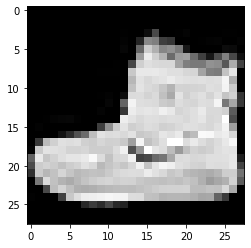

In [4]:
import matplotlib.pyplot as plt
plt.imshow(data[0], cmap="gray")
plt.show()

Let's also check the label distribution.

In [7]:
import numpy as np
labels, counts = np.unique(target, return_counts=True)
for (label, count) in zip(labels, counts):
    print(label, count)

0 6000
1 6000
2 6000
3 6000
4 6000
5 6000
6 6000
7 6000
8 6000
9 6000


Let's set up a neural network to work with this dataset.

In [7]:
network = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We'll need to set aside some of the training set to use for validation.

In [5]:
from sklearn.model_selection import train_test_split
train_data, valid_data, train_target, valid_target = train_test_split(data, target, test_size=0.1)

Also we'll need to scale the pixels from 0-255 down to 0-1.

In [6]:
train_data = train_data / 255
valid_data = valid_data / 255
test_data = test_data / 255

Now we can train the network.

In [9]:
network.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = network.fit(train_data, train_target, epochs=20, batch_size=32, validation_data=(valid_data, valid_target))

Epoch 1/20
1688/1688 [==============================] - 2s 734us/step - loss: 0.5397 - accuracy: 0.8120 - val_loss: 0.4475 - val_accuracy: 0.8398
Epoch 2/20
1688/1688 [==============================] - 1s 694us/step - loss: 0.4032 - accuracy: 0.8562 - val_loss: 0.4159 - val_accuracy: 0.8460
Epoch 3/20
1688/1688 [==============================] - 1s 701us/step - loss: 0.3647 - accuracy: 0.8690 - val_loss: 0.3829 - val_accuracy: 0.8575
Epoch 4/20
1688/1688 [==============================] - 1s 707us/step - loss: 0.3378 - accuracy: 0.8764 - val_loss: 0.3347 - val_accuracy: 0.8802
Epoch 5/20
1688/1688 [==============================] - 1s 713us/step - loss: 0.3211 - accuracy: 0.8825 - val_loss: 0.3503 - val_accuracy: 0.8762
Epoch 6/20
1688/1688 [==============================] - 1s 707us/step - loss: 0.3066 - accuracy: 0.8878 - val_loss: 0.3216 - val_accuracy: 0.8870
Epoch 7/20
1688/1688 [==============================] - 1s 712us/step - loss: 0.2926 - accuracy: 0.8922 - val_loss: 0.3166 -

To see if we've trained long enough, we can check the learning curve.

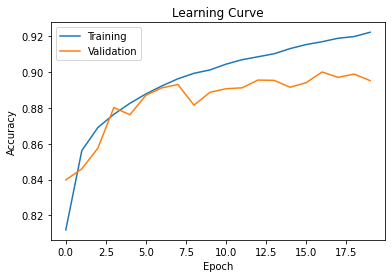

In [10]:
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Let's see how well this network does on the test set.

In [11]:
loss, accuracy = network.evaluate(test_data, test_target)

313/313 [==============================] - 0s 515us/step - loss: 0.3622 - accuracy: 0.8818


Now let's build a convolutional network, which should be able to do even better.

In [12]:
network = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We'll need to add an explicit color channel to the images, because convolutional layers expect 3D inputs.

In [13]:
train_data = train_data.reshape(54000, 28, 28, 1)
valid_data = valid_data.reshape(6000, 28, 28, 1)
test_data = test_data.reshape(10000, 28, 28, 1)

It's possible to train this network right here, but you'd have to be patient.

In [14]:
network.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = network.fit(train_data, train_target, epochs=20, batch_size=32, validation_data=(valid_data, valid_target))

Epoch 1/20
1688/1688 [==============================] - 43s 25ms/step - loss: 0.5794 - accuracy: 0.7843 - val_loss: 0.3541 - val_accuracy: 0.8707
Epoch 2/20
1688/1688 [==============================] - 44s 26ms/step - loss: 0.3752 - accuracy: 0.8614 - val_loss: 0.3092 - val_accuracy: 0.8873
Epoch 3/20
1688/1688 [==============================] - 44s 26ms/step - loss: 0.3243 - accuracy: 0.8787 - val_loss: 0.2855 - val_accuracy: 0.8970
Epoch 4/20
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2950 - accuracy: 0.8906 - val_loss: 0.2469 - val_accuracy: 0.9092
Epoch 5/20
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2765 - accuracy: 0.8968 - val_loss: 0.2317 - val_accuracy: 0.9145
Epoch 6/20
1688/1688 [==============================] - 43s 26ms/step - loss: 0.2590 - accuracy: 0.9030 - val_loss: 0.2226 - val_accuracy: 0.9192
Epoch 7/20
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2450 - accuracy: 0.9084 - val_loss: 0.2155 -

If you do wait for the training to finish, you'll see a higher test accuracy than you got with the small network.

In [15]:
loss, accuracy = network.evaluate(test_data, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2213 - accuracy: 0.9234
